# Matplotlib

Cập nhật lần cuối: 28/11/2021.

In [1]:
import matplotlib.pyplot as plt
# Với các phiên bản cũ của Jupyter Notebook thì có thể cần setup
# thêm bằng câu lệnh magic: 
# %matplotlib inline

import datetime
import math

## Histogram

Dùng để trực quan hóa phân bố các giá trị của biến dạng "numerical"

### Đọc dữ liệu điểm quiz từ file và tiền xử lý

In [2]:
# Đọc dữ liệu về kết quả làm quiz của lớp
# (Code lấy từ file 05-Demo.ipynb)
file = open('Data/PythonQuiz.csv', 'r')

cols = {}
first_line_vals = file.readline().rstrip().split(',')
for first_line_val in first_line_vals:
    cols[first_line_val] = []
for line in file:
    line_vals = line.rstrip().split(',')
    for i in range(len(line_vals)):        
        col_name = first_line_vals[i] 
        col_val = line_vals[i]
        cols[col_name].append(col_val)

file.close()

for col_name, col_vals in cols.items():
    print(f'{col_name}: [{col_vals[0]}, ...]')

State: [Finished, ...]
Started on: [11 November 2021  7:00 PM, ...]
Completed: [11 November 2021  7:13 PM, ...]
Time taken: [13 mins 31 secs, ...]
Grade/16.00: [13.17, ...]
Q. 1 /1.00: [1, ...]
Q. 2 /1.00: [0, ...]
Q. 3 /1.00: [1, ...]
Q. 4 /1.00: [1, ...]
Q. 5 /1.00: [1, ...]
Q. 6 /1.00: [1, ...]
Q. 7 /1.00: [1, ...]
Q. 8 /1.00: [1, ...]
Q. 9 /1.00: [1, ...]
Q. 10 /1.00: [0, ...]
Q. 11 /1.00: [1, ...]
Q. 12 /1.00: [0.67, ...]
Q. 13 /1.00: [1, ...]
Q. 14 /1.00: [1, ...]
Q. 15 /1.00: [0.5, ...]
Q. 16 /1.00: [1, ...]


In [3]:
# Chuyển kiểu dữ liệu của các cột từ str sang kiểu dữ liệu phù hợp
# (Code lấy từ file 05-Demo.ipynb)
for col_name, col_vals in cols.items():
    if '/' in col_name:
        new_col_vals = []
        for col_val in col_vals:
            new_col_vals.append(float(col_val))
        cols[col_name] = new_col_vals
    elif col_name in ['Started on', 'Completed']:
        new_col_vals = []
        for col_val in col_vals:
            temp = datetime.datetime.strptime(
                col_val, '%d %B %Y %H:%M %p')
            new_col_vals.append(temp)
        cols[col_name] = new_col_vals
    elif col_name == 'Time taken':
        new_col_vals = []
        for col_val in col_vals:
            temp_list = col_val.split(' ')
            hour = 0; minute = 0; second = 0
            for temp_i in range(len(temp_list)):
                if 'hour' in temp_list[temp_i]:
                    hour = float(temp_list[temp_i-1])
                elif 'min' in temp_list[temp_i]:
                    minute = float(temp_list[temp_i-1])
                if 'sec' in temp_list[temp_i]:
                    second = float(temp_list[temp_i-1])
            total = hour*60 + minute + second/60
            new_col_vals.append(total)
        cols[col_name] = new_col_vals

for col_name, col_vals in cols.items():
    print(col_name, type(col_vals[0]))

State <class 'str'>
Started on <class 'datetime.datetime'>
Completed <class 'datetime.datetime'>
Time taken <class 'float'>
Grade/16.00 <class 'float'>
Q. 1 /1.00 <class 'float'>
Q. 2 /1.00 <class 'float'>
Q. 3 /1.00 <class 'float'>
Q. 4 /1.00 <class 'float'>
Q. 5 /1.00 <class 'float'>
Q. 6 /1.00 <class 'float'>
Q. 7 /1.00 <class 'float'>
Q. 8 /1.00 <class 'float'>
Q. 9 /1.00 <class 'float'>
Q. 10 /1.00 <class 'float'>
Q. 11 /1.00 <class 'float'>
Q. 12 /1.00 <class 'float'>
Q. 13 /1.00 <class 'float'>
Q. 14 /1.00 <class 'float'>
Q. 15 /1.00 <class 'float'>
Q. 16 /1.00 <class 'float'>


### Vẽ histogram của cột điểm "Grade/16.00" với 4 bin có độ rộng bằng nhau

(array([ 0.,  9., 14., 27.]), array([ 0,  4,  8, 12, 16]), <BarContainer object of 4 artists>)


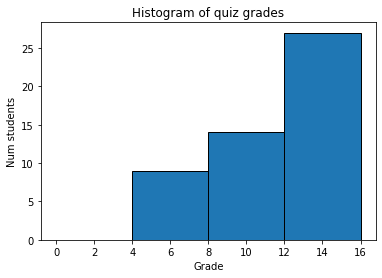

In [4]:
hist = plt.hist(cols['Grade/16.00'], [0, 4, 8, 12, 16], 
                edgecolor='black')
print(hist)
plt.xlabel('Grade')
plt.ylabel('Num students')
plt.title('Histogram of quiz grades');
# plt.savefig('GradesHist.jpg')

Kết quả đã tính ở file "05-Demo.ipynb": \
`{(0, 4): 0, (4, 8): 9, (8, 12): 14, (12, 16): 27}`

Thật ra, qui ước lấy 2 đầu của bin của hàm `plt.hist` khác với qui ước ở file "05-Demo.ipynb". Vậy tại sao kết quả lại giống nhau?

(array([ 4., 16.,  7., 23.]), array([ 4.17  ,  7.1275, 10.085 , 13.0425, 16.    ]), <BarContainer object of 4 artists>)


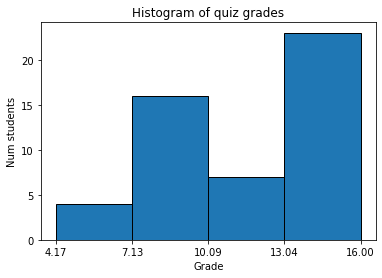

In [5]:
# Chia ra 4 bin có độ rộng bằng nhau
# bằng cách truyền một con số vào tham số bin của plt.hist
hist = plt.hist(cols['Grade/16.00'], 4, 
                edgecolor='black')
print(hist)
plt.xlabel('Grade')
plt.ylabel('Num students')
plt.title('Histogram of quiz grades')
plt.xticks(hist[1]); # Chỉ định tick ở trục hoành cho dễ nhìn

### Vẽ histogram của cột điểm "Grade/16.00" với 2 bin có độ rộng không bằng nhau là [0, 12) và [12, 16]

(array([23., 27.]), array([ 0, 12, 16]), <BarContainer object of 2 artists>)


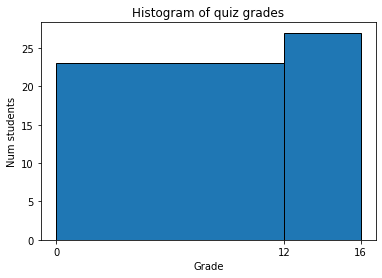

In [6]:
hist = plt.hist(cols['Grade/16.00'], [0, 12, 16], 
                edgecolor='black')
print(hist)
plt.xlabel('Grade')
plt.ylabel('Num students')
plt.title('Histogram of quiz grades')
plt.xticks(hist[1]);

Khi nhìn hình, bạn cảm nhận số lượng sinh viên ở bin thứ 1 như thế nào với bin thứ 2? \
Có vẻ nhiều hơn!

Nhưng cảm nhận này không đúng: bin thứ 1 có 23 sinh viên, còn bin thứ 2 có 27 sinh viên.

Tại sao ta lại có cảm nhận không đúng này? \
Vì mắt của ta tập trung vào diện tích của cột hơn là chiều cao của cột.

Hình vẽ ở trên thật ra không phải là histogram!

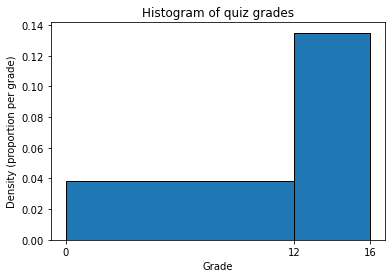

In [7]:
# Đây mới là histogram!
# Diện tích của cột ứng với số lượng sinh viên đã được chuẩn hóa 
# về tỉ lệ tương đối (tổng diện tích của các cột sẽ bằng 1) 
hist = plt.hist(cols['Grade/16.00'], [0, 12, 16], 
         edgecolor='black', density=True)
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.xticks(hist[1])

# Label của trục tung là gì?
plt.ylabel('Density (proportion per grade)');

### Tiếp tục với histogram gồm 2 bin [0, 12) và [12, 16]: phân bố của các giá trị trong bin [12, 16]?

Histogram giả định các giá trị được phân bố đều trong mỗi bin. Điều này được thể hiện bởi đường nằm ngang ở trên đầu cột của mỗi bin.

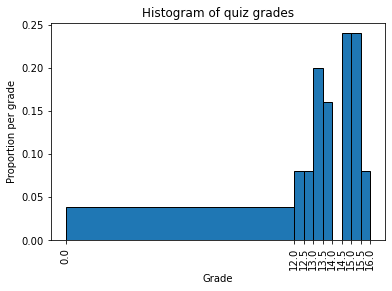

In [8]:
# Thử chi tiết hóa ra bin [12, 16]
hist = plt.hist(cols['Grade/16.00'], 
                [0, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16], 
                edgecolor='black', density=True)
plt.xlabel('Grade')
plt.ylabel('Proportion per grade')
plt.title('Histogram of quiz grades')
plt.xticks(hist[1], rotation=90);

Tùy ngữ cảnh cụ thể mà bạn có thể muốn chi tiết hóa ra, có thể không muốn chi tiết hóa ra, nhưng khi nhìn hình của histogram thì bạn nên hiểu về giả định phân bố đều trong mỗi bin của histogram.

### Vẽ histogram của cột điểm "Grade/16.00" với 4 bin [0, 4), [4, 8), [8, 12), [12, 16] + 3 đường đứng ứng với lower quartile, median, upper quartile

In [9]:
def compute_percentile(data, p):
    sorted_data = sorted(data)
    i = max(math.ceil(p/100 * len(sorted_data)) - 1, 0)
    return sorted_data[i]
lower_quartile = compute_percentile(cols['Grade/16.00'], 25)
median = compute_percentile(cols['Grade/16.00'], 50)
upper_quartile = compute_percentile(cols['Grade/16.00'], 75)
lower_quartile, median, upper_quartile

(8.67, 12.42, 14.5)

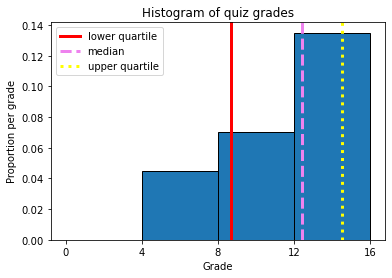

In [10]:
hist = plt.hist(cols['Grade/16.00'], [0, 4, 8, 12, 16], 
                edgecolor='black', density=True)
plt.xlabel('Grade')
plt.ylabel('Proportion per grade')
plt.title('Histogram of quiz grades')
plt.xticks(hist[1])
plt.axvline(lower_quartile, 
            color='red', linestyle='solid', linewidth=3, 
            label='lower quartile')
plt.axvline(median, 
            color='violet', linestyle='dashed', linewidth=3,
            label='median')
plt.axvline(upper_quartile, 
            color='yellow', linestyle='dotted', linewidth=3,
            label='upper quartile')
plt.legend();

Tại sao diện tích của cột từ upper quartile đến max lại không tương đương với từ median đến upper quartile?

Do giả định phân bố đều của histogram trong bin [12, 16] là không chính xác. Thật ra là có nhiều giá trị tập trung vào vùng từ upper quartile đến max hơn là từ median đến upper quartile.

## Bar plot

Dùng để trực quan hóa phân bố các giá trị của biến dạng "categorical"

### Đọc dữ liệu đăng ký chuyên ngành K2019 (CQ) từ file và lấy ra cột các chuyên ngành

In [11]:
file = open('Data/CQ2019Majors.txt', 'r')
majors = []
for line in file:
    # Dòng ứng với thông tin của một sinh viên là dòng 
    # bắt đầu bằng ký tự số
    if line[0].isdigit():
        # Cắt đuôi "hiệu chỉnh từ ..." hoặc "Xét lại với ..."
        # của dòng để thông tin chuyên ngành sẽ luôn ở cuối dòng
        major = ''
        line = line.split('hiệu chỉnh từ')[0]
        line = line.split('Xét lại với')[0]
        line = line.rstrip()
        # Để lấy thông tin chuyên ngành thì ta sẽ duyệt từ cuối 
        # dòng về đầu và sẽ ngắt khi gặp ký tự viết hoa đầu tiên 
        # mà trước đó không có dấu +
        for i in range(len(line) - 1, -1, -1): # Duyệt cuối -> đầu
            major = line[i] + major
            if line[i].isupper() and line[i - 2] != '+':
                break
        majors.append(major)
    
file.close()
majors

['Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Khoa học máy tính + Khoa học dữ liệu',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Hệ thống thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Hệ thống thông tin',
 'Hệ thống thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Không đủ điều kiện',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Hệ thống thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Công nghệ thông tin',
 'Mạng máy tính và viễn thông + Cô

In [12]:
len(majors)

393

### Vẽ bar plot của cột các chuyên ngành

Bước 1: đếm số lần xuất hiện của mỗi chuyên ngành

In [13]:
majors_dist = {}
for major in majors:
    majors_dist[major] = majors_dist.get(major, 0) + 1
diff_majors = list(majors_dist.keys())
counts = list(majors_dist.values())

Bước 2: vẽ bar plot từ kết quả của bước 1

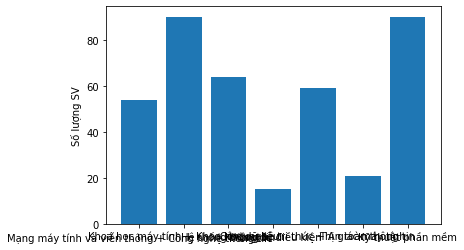

In [14]:
plt.bar(diff_majors, counts)
plt.ylabel('Số lượng SV');

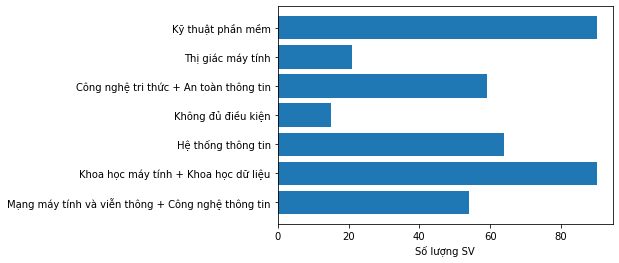

In [15]:
plt.barh(diff_majors, counts)
plt.xlabel('Số lượng SV');

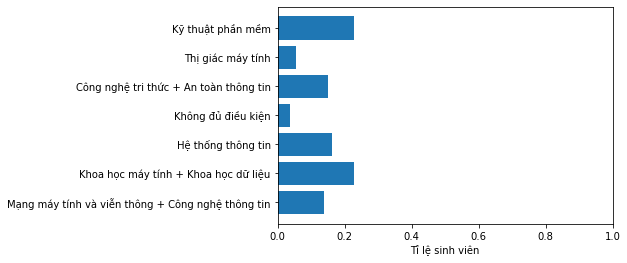

In [16]:
# Trong bar plot, ta thường sẽ chuẩn hóa các giá trị đếm 
# về tỉ lệ tương đối
s = sum(counts)
for i in range(len(counts)):
    counts[i] /= s

plt.barh(diff_majors, counts)
plt.xlabel('Tỉ lệ sinh viên')
plt.xlim(0, 1);

Bar plot vs histogram?

Bar plot | Histogram
:--- | :---
Trục hoành (hay trục tung đối với bar plot nằm ngang) là biến "categorical" | Trục hoành là biến "numerical"
Với biến "categorical" không có tính thứ tự (ví dụ, chuyên ngành) thì các bar không có thứ tự với nhau và ta có thể sắp xếp lại thứ tự của các bar cho dễ nhìn bằng cách sort các bar theo chiều cao; với biến "categorical" có tính thứ tự (ví dụ, mức độ hài lòng với các giá trị: rất hài lòng, hài lòng, không hài lòng, ...) thì các bar có thứ tự với nhau | Các bar có thứ tự với nhau
Các bar có độ rộng bằng nhau, giữa các bar có thể có các khoảng không và các khoảng không này bằng nhau | Các bar có thể có độ rộng không bằng nhau, các bar nằm nối tiếp nhau tạo thành một đoạn liên tục trên trục hoành
Tỉ lệ các phần tử tương ứng với chiều cao của bar | Tỉ lệ các phần tử tương ứng với diện tích của bar

## Ôn lại các câu lệnh đã học

Câu lệnh | Ý nghĩa
:--- | :---
`plt.hist` | Vẽ histogram của biến dạng "numeric"
`plt.bar`, `plt.barh` | Vẽ bar chart của biến dạng "categorical" (cần phải tính số lần hoặc tỉ lệ của các giá trị trước khi vẽ)
`plt.title` | Thêm tựa đề cho hình vẽ
`plt.xlabel` & `plt.ylabel` | Thêm nhãn cho trục x & y
`plt.xlim` & `plt.ylim` | Giới hạn miền giá trị cho trục x & y
`plt.xticks` & `plt.yticks` | Chỉ định các tick cho trục x & y
`plt.axvline` & `plt.axhline` | Vẽ đường thẳng nằm đứng & nằm ngang
`plt.legend` | Thêm chú thích cho ký hiệu, màu, ... trên hình vẽ
`plt.savefig` | Lưu hình vẽ xuống file

## Nói thêm về matplotlib  

### Ba cách dùng matplotlib

<font color=blue>Cách 1: Dùng các câu lệnh của `plt`</font> (trước giờ là làm theo cách này)

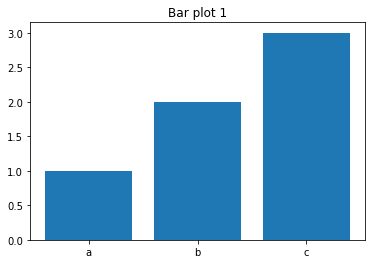

In [17]:
values = ['a', 'b', 'c']
counts = [1, 2, 3]

plt.bar(values, counts) # Đầu tiên, plt sẽ tạo ra một đối tượng
                        # figure ở bên dưới và sau đó sẽ gọi các 
                        # phương thức của đối tượng figure này ...

plt.title('Bar plot 1'); # Các câu lệnh plt sau đó sẽ gọi các
                         # phương thức của cùng đối tượng figure
                         # đã được tạo ra trước đó

In [18]:
plt.savefig('Bar1.jpg') # Ở cell mới thì plt sẽ tạo lại một đối 
                        # tượng figure mới
                        # --> ảnh trống :(

<Figure size 432x288 with 0 Axes>

<font color=blue>Cách 2: Dùng trực tiếp các phương thức của đối tượng figure ở bên dưới</font>

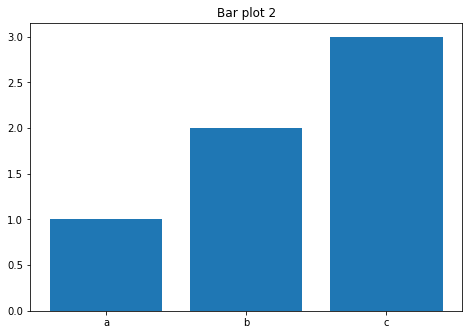

In [19]:
values = ['a', 'b', 'c']
counts = [1, 2, 3]

fig = plt.figure(); ax = fig.add_axes([0, 0, 1, 1])
ax.bar(values, counts)
ax.set_title('Bar plot 2');

In [20]:
fig.savefig('Bar2.jpg') # Ảnh không trống nhưng ...

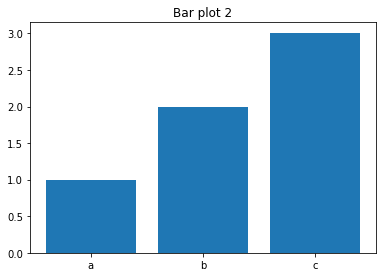

In [21]:
values = ['a', 'b', 'c']
counts = [1, 2, 3]

fig = plt.figure(); ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(values, counts)
ax.set_title('Bar plot 2')
fig.savefig('Bar2.jpg') # :)

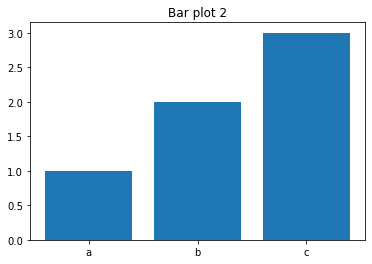

In [22]:
# fig = plt.figure(); ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
fig = plt.figure(); ax = fig.add_subplot() 
ax.bar(values, counts)
ax.set_title('Bar plot 2')
fig.savefig('Bar2.jpg') # :)

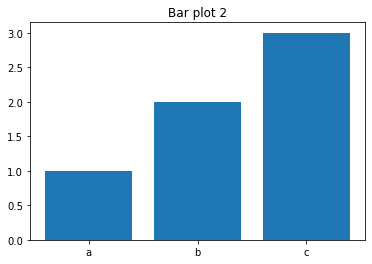

In [23]:
# fig = plt.figure(); ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# fig = plt.figure(); ax = fig.add_subplot() 
fig, ax = plt.subplots()
ax.bar(values, counts)
ax.set_title('Bar plot 2')
fig.savefig('Bar2.jpg') # :)

<font color=blue>Cách 3: Trộn lẫn giữa cách 1 và cách 2</font>

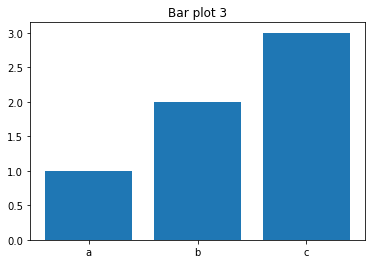

In [24]:
plt.bar(values, counts)
plt.title('Bar plot 3')
fig = plt.gcf() # Lấy đối tượng figure ở bên dưới
# Nếu bạn muốn lấy đối tượng axes ở bên dưới: ax = plt.gca()

In [25]:
fig.savefig('Bar3.jpg') # :)

### Thay đổi style cho các hình vẽ 

In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

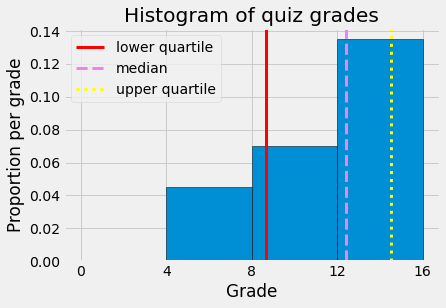

In [27]:
plt.style.use('fivethirtyeight')

hist = plt.hist(cols['Grade/16.00'], bins=[0, 4, 8, 12, 16], 
                edgecolor='black', density=True)
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Proportion per grade')
plt.xticks(hist[1])
plt.axvline(lower_quartile, 
            color='red', linestyle='solid', linewidth=3, 
            label='lower quartile')
plt.axvline(median, 
            color='violet', linestyle='dashed', linewidth=3,
            label='median')
plt.axvline(upper_quartile, 
            color='yellow', linestyle='dotted', linewidth=3,
            label='upper quartile')
plt.legend();

Xem thêm về các style ở [document](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).